In [11]:
import pandas as pd

llama = pd.read_csv('./exp/llama3/results_llama3_n10_seed.csv', delimiter=';')

llama['bleu'] = [float(i.replace(',', '.')) for i in llama['bleu']]
llama['comet'] = [float(i.replace(',', '.')) for i in llama['comet']]
llama['r'] = [str(i) for i in llama['r']]
llama['alpha'] = [str(i) for i in llama['alpha']]

llama

,r,alpha,bleu,comet
0,16,16,65.848178,92.96
1,16,32,65.590000,92.82
2,32,32,66.020631,93.10
3,32,64,66.130000,93.37
4,64,64,67.300422,93.09
5,64,128,67.620000,93.23
6,128,128,70.060000,93.29
7,128,256,69.060000,92.97
8,256,256,67.770000,92.90
9,256,512,66.610000,92.84


In [12]:
equal_alpha = llama[llama['r'] == llama['alpha']]
higher_alpha = llama[llama['r'] != llama['alpha']]

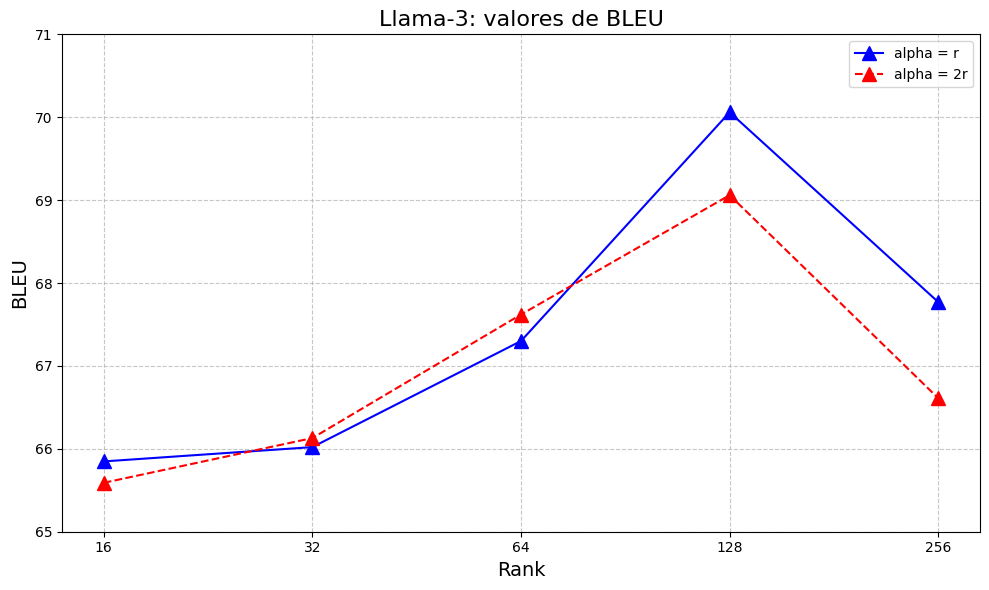

In [22]:
import matplotlib.pyplot as plt

r = ['16', '32', '64', '128', '256']

bleu_eq = equal_alpha['bleu'].to_list()
bleu_alpha = higher_alpha['bleu'].to_list()

plt.figure(figsize=(10, 6))

plt.plot(r, bleu_eq, marker='^', markersize = 10, linestyle='-', color='b', label='alpha = r')
plt.plot(r, bleu_alpha, marker='^', markersize = 10, linestyle='--', color='r', label='alpha = 2r')

plt.ylim(65, 71)

# labels
plt.xlabel('Rank', fontsize=14)
plt.ylabel('BLEU', fontsize=14)
plt.title('Llama-3: valores de BLEU', fontsize=16)
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

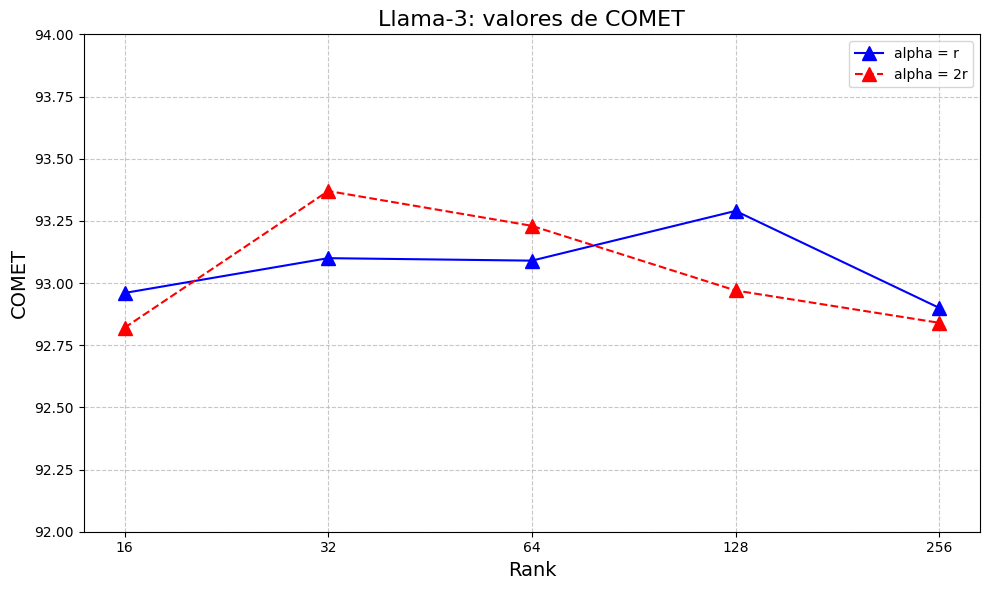

In [24]:
comet_eq = equal_alpha['comet'].to_list()
comet_alpha = higher_alpha['comet'].to_list()

plt.figure(figsize=(10, 6))

plt.plot(r, comet_eq, marker='^', markersize = 10, linestyle='-', color='b', label='alpha = r')
plt.plot(r, comet_alpha, marker='^', markersize = 10, linestyle='--', color='r', label='alpha = 2r')

plt.ylim(92, 94)

# labels
plt.xlabel('Rank', fontsize=14)
plt.ylabel('COMET', fontsize=14)
plt.title('Llama-3: valores de COMET', fontsize=16)
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()